In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
%matplotlib inline

# 前年に比べて打者は四球を多く選ぶことができていたのか？

# 野手の四球、背景の確認
- 就任前の年の2009年シーズンの横浜の四球の数は少なかったと言えるかを確認する。
- 仮説1：過去4シーズンに比べて四球が少なかった
- 仮説2：2009年シーズンは他球団と比較して四球が少なかった。

In [4]:
# チーム成績を取得する。
df_list = []
for year in range(2005, 2011, 1):
    # クローリングする。
    dfs = pd.io.html.read_html('http://npb.jp/bis/' + str(year) + '/stats/tmb_c.html')
    df = dfs[0]
    df.columns = df.iloc[0, :]
    df_sub = df.iloc[1:]
    df_sub['年度'] = year
    df_list.append(df_sub)
    
# 統合
team_score = pd.concat(df_list, axis=0, ignore_index=True)

/home/kyohei/anaconda2/envs/py36con/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
# 四球率（打席あたりの四球数）の推移を計算する。
# 四球と打席数のデータ型を変換する。
team_score['四　球'] = team_score['四　球'].astype(int)
team_score['打　席'] = team_score['打　席'].astype(int)

# 四球率の計算
team_score['四球率'] = team_score['四　球'] / team_score['打　席']

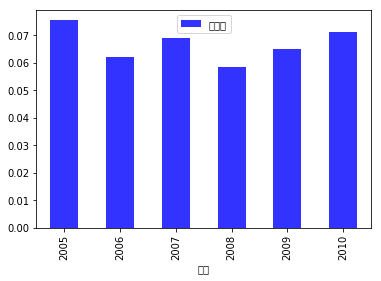

In [10]:
# 横浜ベイスターズの四球率の推移を確認する。
team_score[team_score['チーム']=='横 浜'].plot(kind='bar', x='年度', y='四球率', color='blue', alpha=0.8)

- 2009年は特別少ないと言う感じはしない。
- 強いて言えば2005年よりは低いという感じはする。誤差とは言えない差かどうかを検定する。

In [12]:
# 独立に二項分布に従う2つの郡の比較
# 正規分布に近似されるとして検定を実施する。
def test(n1, x1, n2, x2):
    diff = abs(x1 / n1 - x2 / n2)
    prop_poul = (x1 + x2) / (n1 + n2)
    statistic = diff / np.sqrt(prop_poul*(1-prop_poul)*(n1+n2)/(n1*n2))
    return statistic

In [14]:
# 2009年と2005年の比較
n1 = team_score[(team_score['チーム']=='横 浜') & (team_score['年度']==2005)]['打　席'].values[0]
x1 = team_score[(team_score['チーム']=='横 浜') & (team_score['年度']==2005)]['四　球'].values[0]
n2 = team_score[(team_score['チーム']=='横 浜') & (team_score['年度']==2009)]['打　席'].values[0]
x2 = team_score[(team_score['チーム']=='横 浜') & (team_score['年度']==2009)]['四　球'].values[0]

test_value = test(n1, x1, n2, x2)

# p値の算出
# sf()はサバイバル関数
p_value = scipy.stats.norm.sf(test_value)

print('p値は{}です。'.format(p_value))

p値は0.017786992326575088です。


- 確かに2005年よりは有意に低いということができる。
- 直近で言うと2007年度の水準に頑張って戻そうということがありうる。そことも比較しておこう。

In [15]:
# 2009年と2007年の比較
n1 = team_score[(team_score['チーム']=='横 浜') & (team_score['年度']==2007)]['打　席'].values[0]
x1 = team_score[(team_score['チーム']=='横 浜') & (team_score['年度']==2007)]['四　球'].values[0]
n2 = team_score[(team_score['チーム']=='横 浜') & (team_score['年度']==2009)]['打　席'].values[0]
x2 = team_score[(team_score['チーム']=='横 浜') & (team_score['年度']==2009)]['四　球'].values[0]

test_value = test(n1, x1, n2, x2)

# p値の算出
# sf()はサバイバル関数
p_value = scipy.stats.norm.sf(test_value)

print('p値は{}です。'.format(p_value))

p値は0.20222257459789372です。


- 2007年と2009年に差が無いというキム仮説を棄却することはできなかった。
- なので2007年の数値と2009年の数値を比較して、四球数が減っていると考えるのは危うい考え方になる。
- ましてや2007年の時にしていたことなんかを引っ張りだしたりすることはしないほうが良いという事になる。

次に2009年シーズンの四球数を他のチームと比較します。

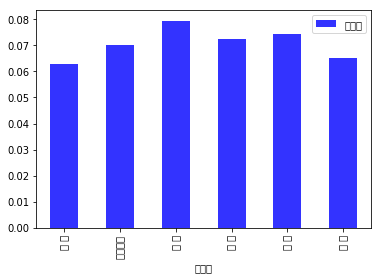

In [17]:
team_score[team_score['年度']==2009].plot(kind='bar', x='チーム', y='四球率', color='blue', alpha=0.8)

In [19]:
team_score[team_score['年度']==2009][['チーム', '四　球', '四球率']]

,チーム,四 球,四球率
24,巨 人,349,0.062894
25,ヤクルト,379,0.070263
26,中 日,432,0.079456
27,阪 神,393,0.072269
28,広 島,397,0.074289
29,横 浜,342,0.065118


- 右から順番に、巨人、ヤクルト、中日、阪神、広島、横浜となります。
- この年の順位は、巨人、中日、ヤクルト、阪神、広島、横浜です。巨人が頭ひとつ抜けだしていて、中日もなかなかの成績でした。
- 横浜の四球率は5番目でした。
- 阪神、広島と比較すると約50個少ないという結果。これだけ稼げればもしかしたら3〜5勝分くらい勝ち星がひっくり返ったかもしれませんね。
- 中日はちょっとダントツ気味なので、広島あたりの水準に持って行きたいというのが、監督のしての心情でしょうか。

In [22]:
# 広島と横浜の比較
n1 = team_score[(team_score['チーム']=='横 浜') & (team_score['年度']==2009)]['打　席'].values[0]
x1 = team_score[(team_score['チーム']=='横 浜') & (team_score['年度']==2009)]['四　球'].values[0]
n2 = team_score[(team_score['チーム']=='広 島') & (team_score['年度']==2009)]['打　席'].values[0]
x2 = team_score[(team_score['チーム']=='広 島') & (team_score['年度']==2009)]['四　球'].values[0]

test_value = test_(n1 ,x1, n2, x2)

p_value = scipy.stats.norm.sf(test_value)
print('p値は{}です。'.format(p_value))

p値は0.031938987527965444です。


- 広島と横浜の差は偶然によるものとは考えられない。
- 一応年度毎の方でも有意差はアルことを確認しましたが、どちらかというとこちらのグラフの方が問題意識を持ちやすそうですし、他チームの成績と比較して問題式を持ちますね。

In [23]:
print('2009年シーズンの四死球数は{}個です。'.format(team_score[(team_score['チーム']=='横 浜') & (team_score['年度']==2009)]['四　球'].values[0]))
print('2010年シーズンの四死球数は{}個です。'.format(team_score[(team_score['チーム']=='横 浜') & (team_score['年度']==2010)]['四　球'].values[0]))

2009年シーズンの四死球数は342個です。
2010年シーズンの四死球数は385個です。


- 四球数は40個増加しました！
- 検定にかけてみて、この差が有意な差なのかを確認してみましょう。

In [24]:
# 2009年と2010年の比較
# それなりに増えているのが期待します。
n1 = team_score[(team_score['チーム']=='横 浜') & (team_score['年度']==2009)]['打　席'].values[0]
x1 = team_score[(team_score['チーム']=='横 浜') & (team_score['年度']==2009)]['四　球'].values[0]
n2 = team_score[(team_score['チーム']=='横 浜') & (team_score['年度']==2010)]['打　席'].values[0]
x2 = team_score[(team_score['チーム']=='横 浜') & (team_score['年度']==2010)]['四　球'].values[0]

test_value = test_(n1 ,x1, n2, x2)

p_value = scipy.stats.norm.sf(test_value)
print('p値は{}です。'.format(p_value))

p値は0.10495287180798674です。


- 棄却できませんでした。優位な差があったかどうかはわかりませんでした。
- そもそもこうゆう場合現場ではどう判断するんでしょうね。謎。